## Docling

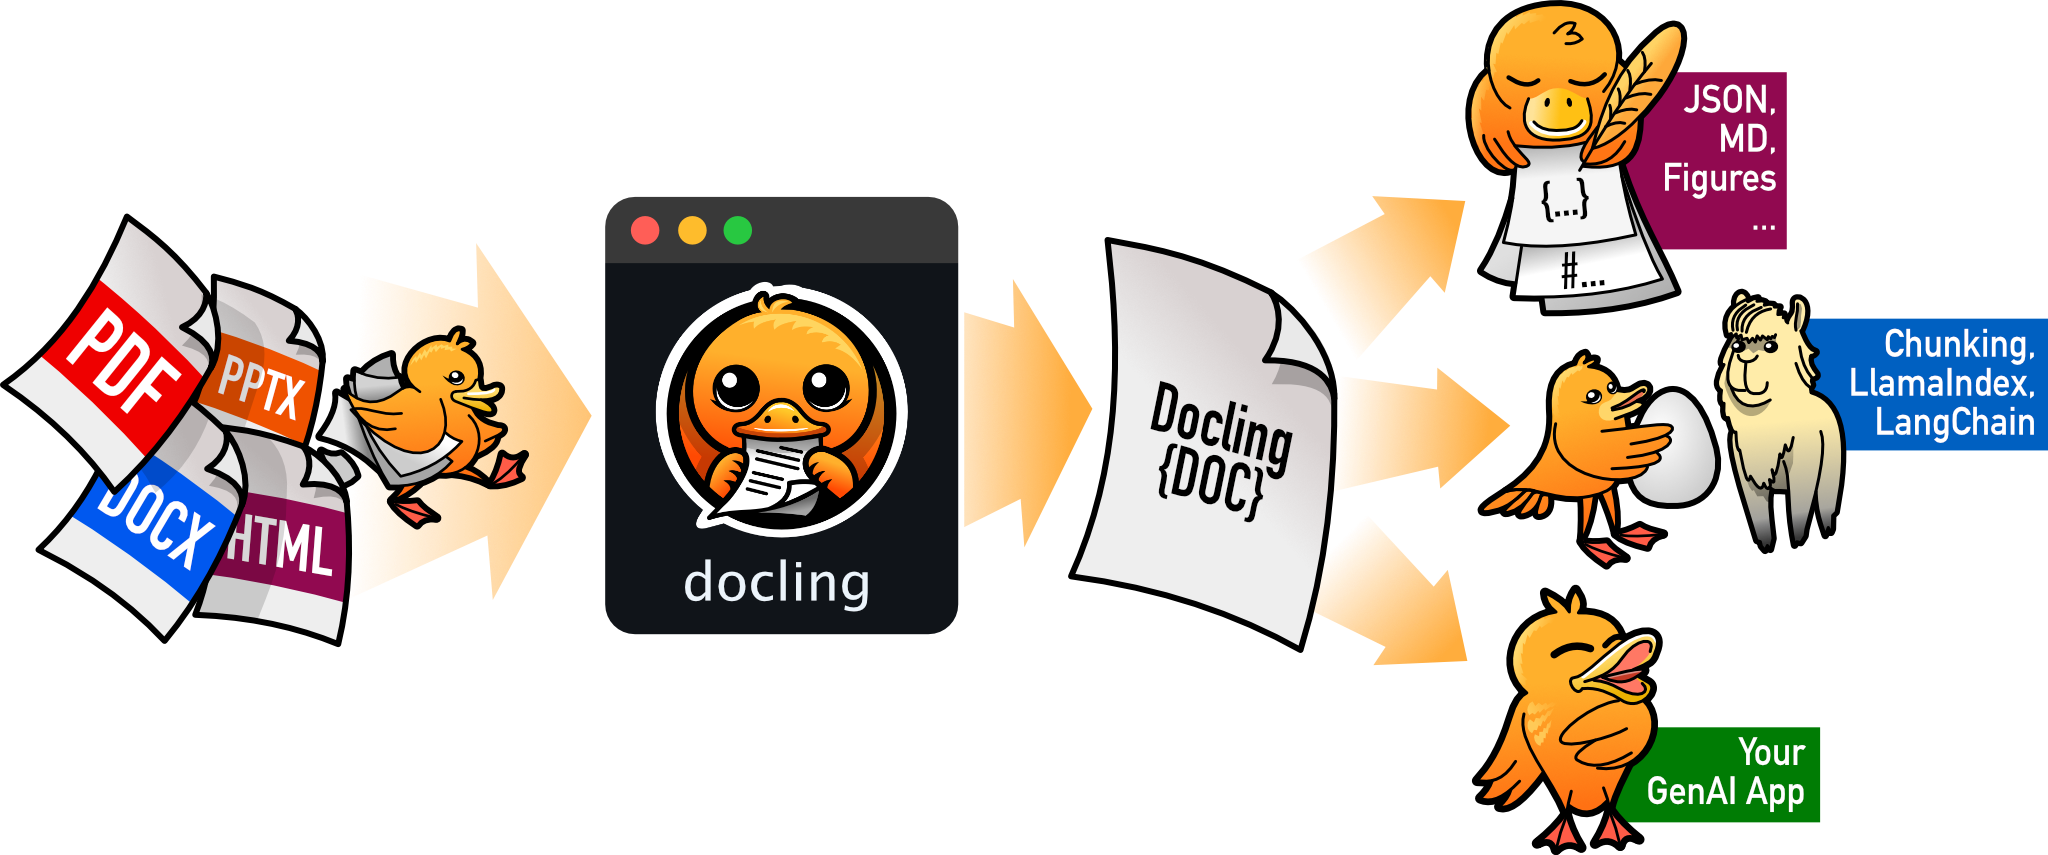

**Environment and Installation - Terminal Commands**

```python

python3 -m venv docling-venv

source docling-venv/bin/activate

pip install docling

```

<p>Note: Docling has lot of dependencies, it takes time for installation!</p>

In [2]:
from docling.document_converter import DocumentConverter

/home/mayur/docling-venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Simple PDF to Markdown

- Reading the PDF from the URL, and parsing it into Markdown

In [19]:
source = "https://arxiv.org/pdf/2408.09869"

converter = DocumentConverter() # Downloads - Detection model, Recognition model
result = converter.convert(source)

print(result.document.export_to_markdown())

INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Initializing pipeline for StandardPdfPipeline with options hash 70041f74270850b7bedf7c8f5c2dcede
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.pipeline.base_pipeline:Processing document 2408.09869v5.pdf
INFO:docling.document_converter:Finished converting document 2408.09869v5.pdf in 22.87 sec.


<!-- image -->

## Docling Technical Report

Version 1.0

Christoph Auer Maksym Lysak Ahmed Nassar Michele Dolfi Nikolaos Livathinos Panos Vagenas Cesar Berrospi Ramis Matteo Omenetti Fabian Lindlbauer Kasper Dinkla Lokesh Mishra Yusik Kim Shubham Gupta Rafael Teixeira de Lima Valery Weber Lucas Morin Ingmar Meijer Viktor Kuropiatnyk Peter W. J. Staar

AI4K Group, IBM Research R¨ uschlikon, Switzerland

## Abstract

This technical report introduces Docling , an easy to use, self-contained, MITlicensed open-source package for PDF document conversion. It is powered by state-of-the-art specialized AI models for layout analysis (DocLayNet) and table structure recognition (TableFormer), and runs efficiently on commodity hardware in a small resource budget. The code interface allows for easy extensibility and addition of new features and models.

## 1 Introduction

Converting PDF documents back into a machine-processable format has been a major challenge for decades due to their huge variabi

In [4]:
source = "/home/mayur/Downloads/docling.pdf"  

converter = DocumentConverter() # Downloads - Detection model, Recognition model
result = converter.convert(source)

print(result.document.export_to_markdown())

<!-- image -->

## Docling Technical Report

Version 1.0

Christoph Auer Maksym Lysak Ahmed Nassar Michele Dolfi Nikolaos Livathinos Panos Vagenas Cesar Berrospi Ramis Matteo Omenetti Fabian Lindlbauer Kasper Dinkla Lokesh Mishra Yusik Kim Shubham Gupta Rafael Teixeira de Lima Valery Weber Lucas Morin Ingmar Meijer Viktor Kuropiatnyk Peter W. J. Staar

AI4K Group, IBM Research R¨ uschlikon, Switzerland

## Abstract

This technical report introduces Docling , an easy to use, self-contained, MITlicensed open-source package for PDF document conversion. It is powered by state-of-the-art specialized AI models for layout analysis (DocLayNet) and table structure recognition (TableFormer), and runs efficiently on commodity hardware in a small resource budget. The code interface allows for easy extensibility and addition of new features and models.

## 1 Introduction

Converting PDF documents back into a machine-processable format has been a major challenge for decades due to their huge variabi

### Utilizing Accelerators to parse documents quickly

In [5]:
import json
import logging
import time
from pathlib import Path

from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    AcceleratorDevice,
    AcceleratorOptions,
    PdfPipelineOptions,
)
from docling.document_converter import DocumentConverter, PdfFormatOption

_log = logging.getLogger(__name__)

In [20]:
def main():
    logging.basicConfig(level=logging.INFO)

    input_doc_path = Path("/home/mayur/Downloads/docling.pdf")

    ###########################################################################

    # The following sections contain a combination of PipelineOptions
    # and PDF Backends for various configurations.
    # Uncomment one section at the time to see the differences in the output.

    # PyPdfium without EasyOCR
    # PyPdfium with EasyOCR
    # Docling Parse without EasyOCR
    # Docling Parse with Tesseract
    # Docling Parse with ocrmac(Mac only)
    
    
    # Docling Parse with EasyOCR
    # ----------------------
    pipeline_options = PdfPipelineOptions()
    pipeline_options.do_ocr = True
    pipeline_options.do_table_structure = True
    pipeline_options.table_structure_options.do_cell_matching = True
    pipeline_options.ocr_options.lang = ["es"]
    pipeline_options.accelerator_options = AcceleratorOptions(
        num_threads=4, device=AcceleratorDevice.AUTO
    )

    # With GPU
    doc_converter_with_GPU = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
        }
    )

    # Docling Parse with EasyOCR (CPU only)
    # ----------------------
    pipeline_options = PdfPipelineOptions()
    pipeline_options.do_ocr = True
    pipeline_options.ocr_options.use_gpu = False  # <-- set this.
    pipeline_options.do_table_structure = True
    pipeline_options.table_structure_options.do_cell_matching = True

    # Without GPU
    doc_converter_without_GPU = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
        }
    )

    ##### With GPU
    start_time = time.time()
    conv_result = doc_converter_with_GPU.convert(input_doc_path)
    end_time = time.time() - start_time

    _log.info(f"Document converted in {end_time:.2f} seconds with GPU. \n")

    ## Export results
    output_dir = Path("scratch")
    output_dir.mkdir(parents=True, exist_ok=True)
    doc_filename = conv_result.input.file.stem

    # Export Deep Search document JSON format:
    with (output_dir / f"{doc_filename}.json").open("w", encoding="utf-8") as fp:
        fp.write(json.dumps(conv_result.document.export_to_dict()))

    # Export Text format:
    with (output_dir / f"{doc_filename}.txt").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_text())

    # Export Markdown format:
    with (output_dir / f"{doc_filename}.md").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_markdown())

    # Export Document Tags format:
    with (output_dir / f"{doc_filename}.doctags").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_document_tokens())

    ##### Without GPU
    start_time = time.time()
    conv_result = doc_converter_without_GPU.convert(input_doc_path)
    end_time = time.time() - start_time

    _log.info(f"Document converted in {end_time:.2f} seconds without GPU.\n")

    ## Export results
    output_dir = Path("scratch")
    output_dir.mkdir(parents=True, exist_ok=True)
    doc_filename = conv_result.input.file.stem

    # Export Deep Search document JSON format:
    with (output_dir / f"{doc_filename}.json").open("w", encoding="utf-8") as fp:
        fp.write(json.dumps(conv_result.document.export_to_dict()))

    # Export Text format:
    with (output_dir / f"{doc_filename}.txt").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_text())

    # Export Markdown format:
    with (output_dir / f"{doc_filename}.md").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_markdown())

    # Export Document Tags format:
    with (output_dir / f"{doc_filename}.doctags").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_document_tokens())

main()

INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Initializing pipeline for StandardPdfPipeline with options hash dd4327e08668463153bee7a9220b4c04
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'


INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.pipeline.base_pipeline:Processing document docling.pdf
INFO:docling.document_converter:Finished converting document docling.pdf in 21.66 sec.
INFO:__main__:Document converted in 21.66 seconds with GPU. 

/tmp/ipykernel_6574/733392426.py:78: DeprecationWarning: Use export_to_doctags() instead.
  fp.write(conv_result.document.export_to_document_tokens())
INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Initializing pipeline for StandardPdfPipeline with options hash 70041f74270850b7bedf7c8f5c2dcede
/home/mayur/docling-venv/lib/python3.10/site-packages/docling/models/easyocr_model.py:69: UserWarning: Deprecated field. Better to set the `accelerator_options.device` in `pipeline_options`. When `use_gpu and accelerator_options.device == AcceleratorDevice.CUDA` the GPU is used to run EasyOCR. Otherwise

**Finished converting document docling.pdf in 21.40 sec with GPUs.** 

**Finished converting document docling.pdf in 31.19 sec without GPUs.**

### Custom OCR

In [16]:
!pip install rapidocr_onnxruntime
from huggingface_hub import snapshot_download

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 826.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 KB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 1.5 MB/s eta 0:00:00a 0:00:01


In [21]:
import os
from docling.datamodel.pipeline_options import PdfPipelineOptions, RapidOcrOptions
from docling.document_converter import (
    ConversionResult,
    DocumentConverter,
    InputFormat,
    PdfFormatOption,
)

In [22]:
def main():
    # Source document to convert
    source = "https://arxiv.org/pdf/2408.09869v4"

    # Download RappidOCR models from HuggingFace
    print("Downloading RapidOCR models")
    download_path = snapshot_download(repo_id="SWHL/RapidOCR")

    # Setup RapidOcrOptions for english detection
    det_model_path = os.path.join(
        download_path, "PP-OCRv4", "en_PP-OCRv3_det_infer.onnx"
    )
    rec_model_path = os.path.join(
        download_path, "PP-OCRv4", "ch_PP-OCRv4_rec_server_infer.onnx"
    )
    cls_model_path = os.path.join(
        download_path, "PP-OCRv3", "ch_ppocr_mobile_v2.0_cls_train.onnx"
    )
    ocr_options = RapidOcrOptions(
        det_model_path=det_model_path,
        rec_model_path=rec_model_path,
        cls_model_path=cls_model_path,
    )

    pipeline_options = PdfPipelineOptions(
        ocr_options=ocr_options,
    )

    # Convert the document
    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_options=pipeline_options,
            ),
        },
    )

    conversion_result: ConversionResult = converter.convert(source=source)
    doc = conversion_result.document
    md = doc.export_to_markdown()
    print(md)

main()

INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Initializing pipeline for StandardPdfPipeline with options hash 4b1b880d46b2d5754eb36cab2d9f70f0
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
2025-05-01 17:50:56,342 - OrtInferSession - WARNING: CUDAExecutionProvider is not in available providers (['AzureExecutionProvider', 'CPUExecutionProvider']). Use AzureExecutionProvider inference by default.
2025-05-01 17:50:56,343 - OrtInferSession - INFO: !!!Recommend to use rapidocr_paddle for inference on GPU.
INFO:OrtInferSession:!!!Recommend to use rapidocr_paddle for inference on GPU.
2025-05-01 17:50:56,343 - OrtInferSession - INFO: (For reference only) If you want to use GPU acceleration, you must do:
INFO:OrtInferSession:(For reference only) If you want to use GPU acceleration, you must do:
2025-05-01 17:50:56,345 - OrtInferSession - INFO: First, uninstall all onnxruntime pakcages in current environment.
INFO:OrtInferS

## Docling Technical Report

Nikolaos Livathinos * , Christoph Auer * , Maksym Lysak, Ahmed Nassar, Michele Dolfi, Panagiotis Vagenas, Cesar Berrospi, Matteo Omenetti, Kasper Dinkla, Yusik Kim, Shubham Gupta, Rafael Teixeira de Lima, Valery Weber, Lucas Morin, Ingmar Meijer, Viktor Kuropiatnyk, Peter W. J. Staar

IBM Research, R¨ uschlikon, Switzerland

Please send correspondence to: deepsearch-core@zurich.ibm.com

## Abstract

We introduce Docling , an easy-to-use, self-contained, MITlicensed, open-source toolkit for document conversion, that can parse several types of popular document formats into a unified, richly structured representation. It is powered by state-of-the-art specialized AI models for layout analysis (DocLayNet) and table structure recognition (TableFormer), and runs efficiently on commodity hardware in a small resource budget. Docling is released as a Python package and can be used as a Python API or as a CLI tool. Docling's modular architecture and efficient documen